In [6]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

import matplotlib.pyplot as plt
import random


In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

LOAD DATASET

In [9]:
import numpy as np
X_train = np.loadtxt(r"C:\Users\HP\Downloads\input.csv", delimiter=',')
Y_train = np.loadtxt(r"C:\Users\HP\Downloads\labels.csv", delimiter=',')

X_test = np.loadtxt(r"C:\Users\HP\Downloads\input_test.csv", delimiter=',')
Y_test = np.loadtxt(r"C:\Users\HP\Downloads\labels_test.csv", delimiter=',')



In [10]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)


shape of X_train:  (2000, 30000)
shape of Y_train:  (2000,)
shape of X_test:  (400, 30000)
shape of Y_test:  (400,)


In [12]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)


X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [13]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


In [14]:
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
X_train[1, :]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

688


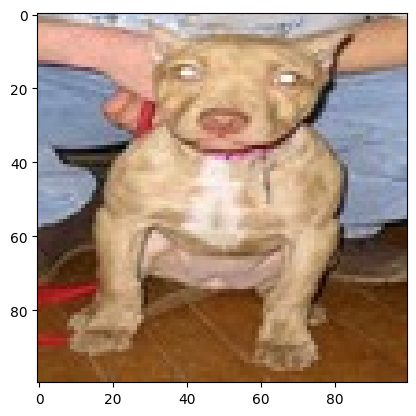

In [16]:
idx = random.randint(0, len(X_train))
print(idx)

plt.imshow(X_train[idx, :])
plt.show()

MODEL

APPROACH 1

In [17]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape =(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'), # output => 
    Dense(1, activation='sigmoid') # outpu 0 or 1
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


APPROACH 2

In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape =(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


KERAS ==> optimizers , losses , metrics

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5123 - loss: 0.7098
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.6177 - loss: 0.6590
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6865 - loss: 0.5951
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.7435 - loss: 0.5310
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.7770 - loss: 0.4867


In [21]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6767 - loss: 0.5686


[0.5481922626495361, 0.7049999833106995]

MAKING PREDICTIONS 

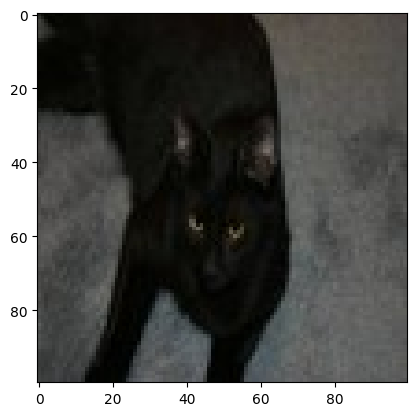

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[False]]
Our model says it is a:  dog


In [22]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()


y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred>0.5
print(y_pred)

if (y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'


print("Our model says it is a: ", pred)
